In [51]:
import pickle
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from scipy.interpolate import interp1d
from matplotlib.colors import Normalize
import traceback
import matplotlib.gridspec as gridspec

'''
Obviously need SimInfo pickles from Config_dir
Update the newest Merians from update_merians.ipynb
what needs to be run to make this work
Reff and Profiles from ImageCollection, dont think I need to run isophote masking, except maybe for x00y00
StShapes, DMShapes from 3DShapes
smoothed shapes from 3DShapesSmoothing
halotypes from halotypes.py, in the case of Merians they are all simply centrals
masses from get_masses.py
try/except blocks should catch any mismatches, so don't need to worry too much about everything being perfect. 
'''
    
def T(ba,ca):
    return( (1-ba**2)/(1-ca**2) )



In [52]:
import StellarDMTracing as sdt

#define color scheme to use for plots as a dict


In [116]:
def main(B_s,C_s,T_s,B_d,C_d,T_d,masses,mb,htype,reff,mvir,feedback_type,label,reff_multi =1):
    data_type = 'all'


    print(len(masses),len(htype))
    #condition0 = (np.log10(10**masses/mvir) < -2)  &  (( C_s >.5 ) & (B_s > .6 )) & (( C_d >.5 ) & (B_d > .6 )) & (masses > 6) & (masses < 9) & (reff < 1)
    #print(sum(condition0))
            
    mb = np.log10(10**masses/mvir)

    

    

    T_diff = np.array((T_d - T_s))
    avg_B = 1#np.average([B_d, B_s], axis=0)
    avg_C = 1#np.average([C_d, C_s], axis=0)
    distances = (np.sqrt(((B_d - B_s) / avg_B) ** 2 + ((C_d - C_s) / avg_C) ** 2))

    #angles = compute_angle_between_ellipsoids(Ed, Es)
    #print(angles[0])



    # Define conditions
    
    #condition1 = (mb < -2)  &  (( C_s >.5 ) & (B_s > .6 )) & (( C_d >.5 ) & (B_d > .6 )) & (masses > 6) & (masses < 9) & (reff < 1)
    #print(sum(condition1))
    #(mb < -1.5) & ((C_s > 0.5) & (B_s > 0.6)) & ((C_d > 0.4) & (B_d > 0.5)) & (masses > 6) & (masses < 9) & (reff < 1)


    
    ### initialize conditions filters ###
    condition = (mb < -2.5)  
    cm = masses
    #condition1 = feedback_type == 'MerianCDM'
    #condition2 = feedback_type == 'BW'
    #condition3 = T_s <.3 
    #condition6 = T_s >.7
    #conditions = [("All", None),('Dark Matter Dominated',condition), ("Merians", condition1), ('DCJL+Marvel',condition2), ('Disky',condition3), ('Prolate',condition6)]
    conditions = [("Marvel+DCJL+Merians", None),]
    #create_histograms(B_s, C_s, T_s, B_d, C_d, T_d, masses, mb, htype, reff, mvir, conditions,reff_multi)
    plt.close()

    # n = len(conditions)
    # rows = n // 2
    # if n % 2 != 0:
    #     rows += 1
    n = 1


    #axes = axes.flatten()
    # mean_T_diff,std_T_diff, mean_distances , std_distances = np.zeros((n)),np.zeros((n)),np.zeros((n)),np.zeros((n))
    # for i, (label, condition) in enumerate(conditions):
    #     print(label)
    #     print(condition)
    #     mean_T_diff[i],std_T_diff[i], mean_distances[i] , std_distances[i] = analyze_distances(T_diff, distances, condition=condition)
    #     plot_data(axes[i], B_s, C_s, T_s, B_d, C_d, T_d, masses, mb, htype, reff, mvir,feedback_type, condition=condition)
    #     axes[i].set_title(label)
    
    sdt.plot_data(B_s, C_s, T_s, B_d, C_d, T_d, masses, mb, htype, reff, mvir, feedback_type, condition=None)
    
    
    # Save the figure
    plt.tight_layout()
    plt.savefig(f'../../Figures/3DShapes/SVQ_hist_combined.{reff_multi}.png', dpi=300)
    #plt.close()
    #print(Ed[0,:,:])
    #plot_ellipsoid_axes(Ed[1,:,:], Es[1,:,:])
    sdt.T_vs_Mstar(T_d,T_s,masses,mb,htype,label)    
    plt.close()
    
    # distances = np.sqrt((B_d - B_s)**2 + (C_d - C_s)**2)
    # plt.figure()
    # plt.scatter(masses,distances)
    # plt.xlabel('Stellar Mass')
    # plt.ylabel('Shape Distance')
    # plt.show()

    return mean_T_diff,std_T_diff, mean_distances, std_distances

    





#r = np.array((.25,.5,.75,1,1.25,1.5,2))
r = np.array((1,))
n = 1
mean_T_diff = np.zeros((n, len(r)))
std_T_diff = np.zeros((n, len(r)))
mean_distances = np.zeros((n, len(r)))
std_distances = np.zeros((n, len(r)))
SimFilePath = ['../PickleFiles/SimulationInfo.BW.pickle','../PickleFiles/SimulationInfo.MerianCDM.pickle']
MassPath = ['../../Data/BasicData/Marvel_DCJL.Masses.pickle','../../Data/BasicData/MerianCDM.Masses.pickle']
HaloTypePath = ['../../Data/BasicData/HaloTypes.txt','../../Data/BasicData/HaloTypes.MerianCDM.txt']
feedback = ['BW','MerianCDM']

for i in range(0, len(r) ):
    
    mean_T_diff[:,i],std_T_diff[:,i], mean_distances[:,i] , std_distances[:,i] = main(B_s,C_s,T_s,B_d,C_d,T_d,masses,mb,htype,reff,mvir,feedback_type,label = 'CDM',reff_multi = r[i])

#mean_T_diff[:,i],std_T_diff[:,i], mean_distances[:,i] , std_distances[:,i] = main(r[i])
#plt.errorbar(r,mean_T_diff,std_T_diff)
#plt.errorbar(r,mean_distances,std_distances)

76 76


In [53]:
feedbacks = ['BWMDC', 'MerianCDM']
#feedbacks = [ 'MerianCDM']

import importlib
importlib.reload(sdt)
B_s,C_s,T_s,B_d,C_d,T_d,masses,mb,htype,reff,mvir,feedback_type,sims,hids,mergers = sdt.LoadSimData(feedbacks,return_sims=True)



['../PickleFiles/SimulationInfo.BWMDC.pickle', '../PickleFiles/SimulationInfo.MerianCDM.pickle']
0.1969927132079781
0.2595313838796554
0.2522531391417724
0.3703893277047541
0.29322684934278653
0.1539741608736607
stellar b/a and c/a unusually low in sim cptmarvel halo 10
0.07380007742783667
0.3025472953976976
0.43835657544004825
0.2789939246205276
0.20313026147954716
0.3307604259946316
0.43549042487667106
0.23038681697642976
0.29415606786670623
0.25038849374834177
0.23738895285120862
0.2114247988210926
0.3200223294312426
0.11580959446730152
0.24482242764719808
0.2172080727095991
0.16222419636671065
0.3570293702190355
Key error <class 'KeyError'> in sim, halo rogue,1
Traceback (most recent call last):
  File "/home/bk639/MorphologyMeasurements/Code/IntrinsicShapes/StellarDMTracing.py", line 87, in LoadSimData
    Reff = Profiles[str(hid)]['x000y000']['Reff'] * reff_multi
           ~~~~~~~~^^^^^^^^^^
KeyError: '1'

Key error <class 'KeyError'> in sim, halo rogue,3
Traceback (most recent 

In [5]:
print(mb)


[0.19699271 0.25953138 0.25225314 0.37038933 0.29322685 0.15397416
 0.3025473  0.43835658 0.27899392 0.20313026 0.33076043 0.43549042
 0.23038682 0.29415607 0.25038849 0.23738895 0.2114248  0.32002233
 0.11580959 0.24482243 0.21720807 0.1622242  0.35702937 0.45237448
 0.33737567 0.30664775 0.26835805 0.30313113 0.27547485 0.23751501
 0.42361446 0.47047707 0.18467627 0.22775458 0.19569768 0.38266619
 0.50022241 0.39869255 0.69919001 0.62445685 0.41909028 0.31333708
 0.59903582 0.28537889 0.3264959  0.32234809 0.26112498 0.54610812
 0.53139637 0.38786115 0.30868219 0.1835328  0.25484411 0.22663557
 0.16924423 0.45199747 0.46480584 0.20945369 0.20736524 0.26257411
 0.41120234 0.14739305 0.23341558 0.19158405 0.33179495 0.33623428
 0.30095631 0.27257172 0.20899424 0.1634009 ]


Disky galaxies:     Q_D/Q_*  mean: 1.66, std: 0.46
Non-Disky galaxies: Q_D/Q_*  mean: 1.05, std: 0.25
Disky galaxies:     S_D/S_*  mean: 1.07, std: 0.09
Non-Disky galaxies: S_D/S_*  mean: 0.99, std: 0.13
Disky galaxies:     T_D/T_*  mean: 0.97, std: 0.30
Non-Disky galaxies: T_D/T_*  mean: 1.06, std: 0.26


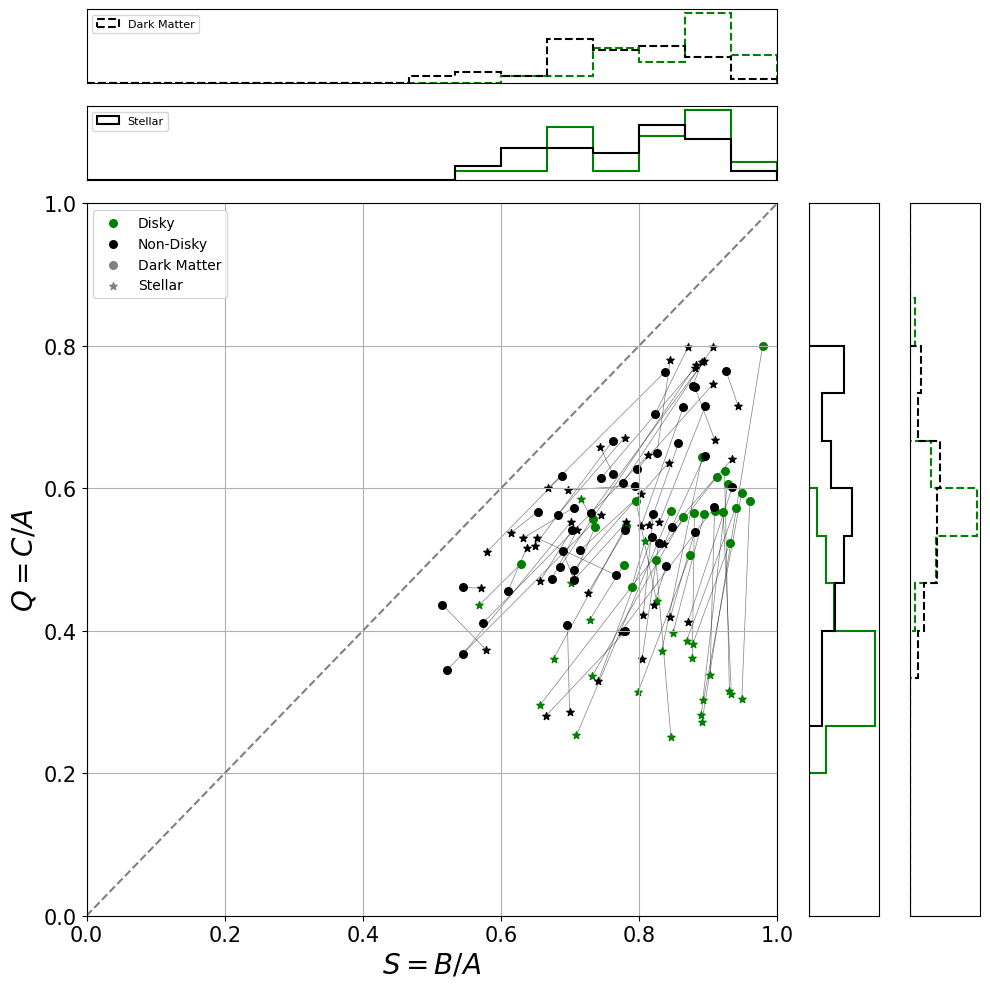

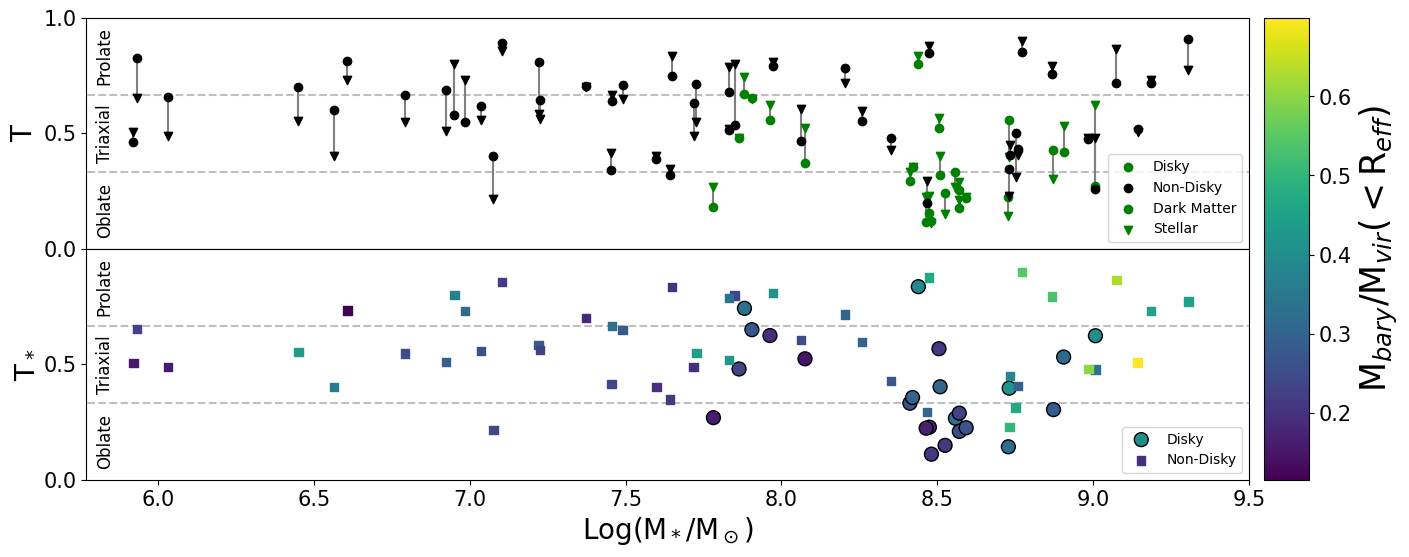

In [66]:

#mask out disk galaxies
#list of sims halos with disk galaxies
disk_sims_pickle = 'disk_sims_results.pickle'

disk_sims = pickle.load(open(disk_sims_pickle,'rb'))
#print(disk_sims)
mask = np.zeros(len(sims),dtype=bool)
#print(mask)
#print(len(sims))
#print(len(disk_sims))
#print(sims)
for sim in disk_sims:
    for halo in disk_sims[sim]:
        disk_sim = disk_sims[sim][halo]
        #print(f'{sim} {halo} {disk_sim}')
        if disk_sim:
            mask[sims == sim] = True
        if not disk_sim:
            mask[sims == sim] = False

#print(mask)
import importlib
importlib.reload(sdt)
from StellarDMTracing import colors
sdt.plot_data_with_disky(B_s, C_s, T_s, B_d, C_d, T_d, masses, mb, htype, reff, mvir, feedback_type, mask,
                         mergers=None, show_lines=True, show_scatter=True)


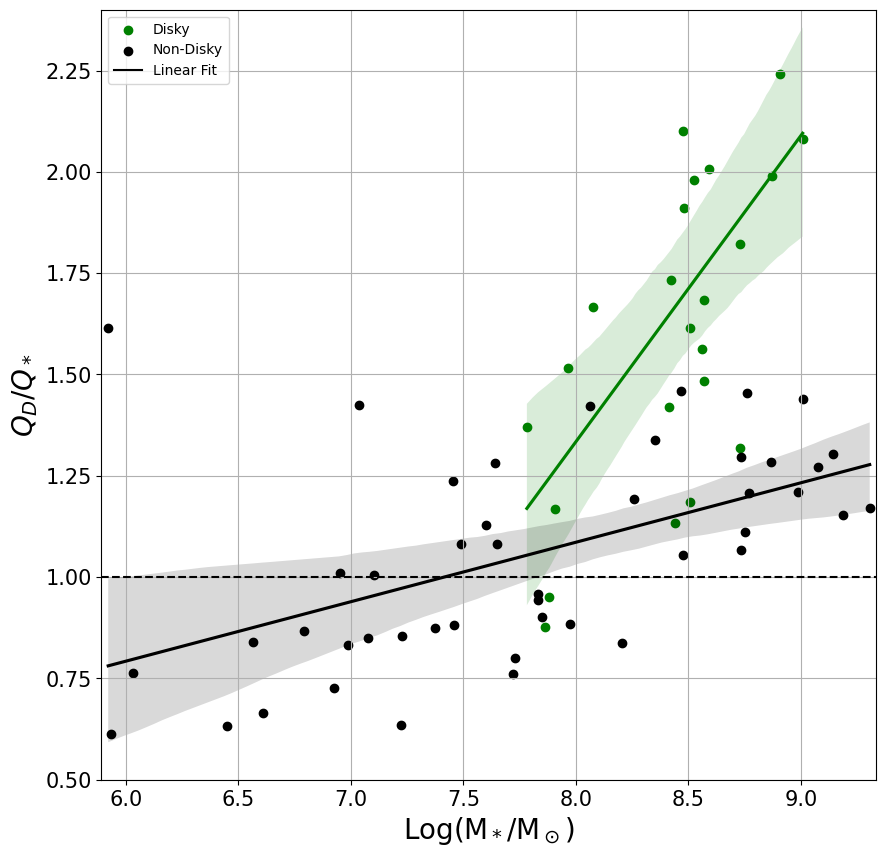

In [65]:

import importlib
importlib.reload(sdt)
sdt.MvC_diffBdiff_disks(B_s, C_s, T_s, B_d, C_d, T_d, masses, mb, htype, reff, mvir, feedback_type, mask, mergers=None)

FileNotFoundError: [Errno 2] No such file or directory: '../../Data/MergerShapes.MerianCDM.pickle'

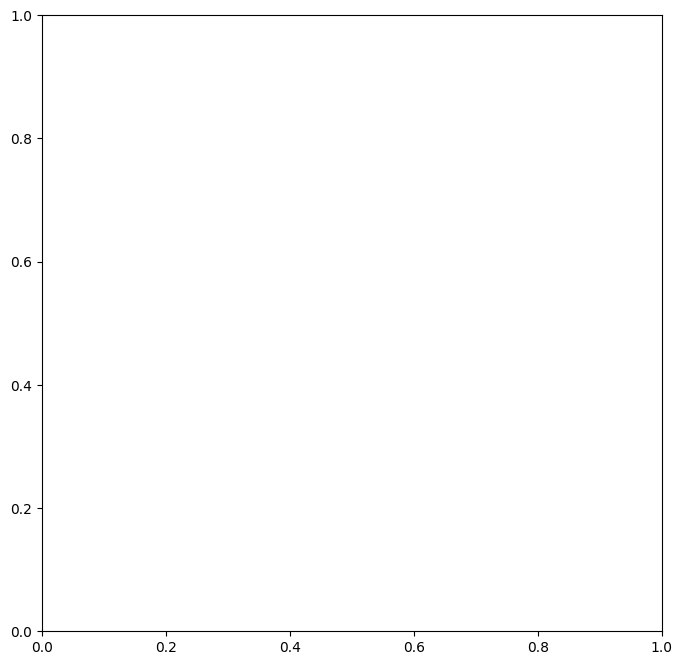

In [7]:
#load pickle files f'../../Data/MergerShapes.{feedback}.pickle', 'wb'))
feedbacks = ['MerianCDM']
fig,ax = plt.subplots(1,1,figsize=(8,8))
for feedback in feedbacks:
    mergers = pickle.load(open(f'../../Data/MergerShapes.{feedback}.pickle', 'rb'))
    for sim in mergers:
        for halo in mergers[sim]:
            colors = ['r','b','g']
            for snapshot,color in zip(mergers[sim][halo],colors):
                B_s = mergers[sim][halo][snapshot]['ba_s_smoothed_at_Reff']
                C_s = mergers[sim][halo][snapshot]['ca_s_smoothed_at_Reff']
                B_d = mergers[sim][halo][snapshot]['ba_d_smoothed_at_Reff']
                C_d = mergers[sim][halo][snapshot]['ca_d_smoothed_at_Reff']
                T_s = T(B_s,C_s)
                T_d = T(B_d,C_d)
                ax.scatter(B_s,C_s,c=color,marker='*',label='Stellar')
                ax.scatter(B_d,C_d,c=color,marker='o',label='Dark Matter')
                ax.plot([B_s,B_d],[C_s,C_d],c=color)
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_xlabel('B/A')
ax.set_ylabel('C/A')
ax.set_title('Merger Shapes')
ax.legend()
plt.show()

                
                

In [53]:
print(sims)

['cptmarvel' 'cptmarvel' 'cptmarvel' 'cptmarvel' 'cptmarvel' 'elektra'
 'elektra' 'elektra' 'elektra' 'elektra' 'elektra' 'rogue' 'rogue' 'rogue'
 'rogue' 'rogue' 'rogue' 'rogue' 'rogue' 'rogue' 'h148' 'h148' 'h148'
 'h148' 'h148' 'h148' 'h148' 'h148' 'h229' 'h229' 'h229' 'h229' 'h242'
 'h242' 'r442' 'r468' 'r488' 'r489' 'r492' 'r502' 'r523' 'r544' 'r552'
 'r555' 'r556' 'r563' 'r569' 'r571' 'r597' 'r613' 'r614' 'r642' 'r656'
 'r716' 'r718' 'r753' 'r761' 'r850' 'r852' 'r886' 'r916' 'r918' 'r977']


In [56]:
distances = np.sqrt((B_d - B_s)**2 + (C_d - C_s)**2)
T_diff = T_d - T_s
print('all data')
mean_T_diff, std_T_diff, mean_distances, std_distances = sdt.analyze_distances(T_diff, distances, condition=None)
print('disky')
mean_T_diff, std_T_diff, mean_distances, std_distances = sdt.analyze_distances(T_diff, distances, condition=mask)
print('non-disky')
mean_T_diff, std_T_diff, mean_distances, std_distances = sdt.analyze_distances(T_diff, distances, condition=~mask)

all data
Mean T_diff = 0.001, Std T_diff = 0.13, Mean Distances = 0.17, Std Distances = 0.11
disky
Mean T_diff = -0.007, Std T_diff = 0.13, Mean Distances = 0.18, Std Distances = 0.11
non-disky
Mean T_diff = 0.017, Std T_diff = 0.12, Mean Distances = 0.15, Std Distances = 0.11


/home/bk639/miniconda3/envs/shapes/lib/python3.12/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


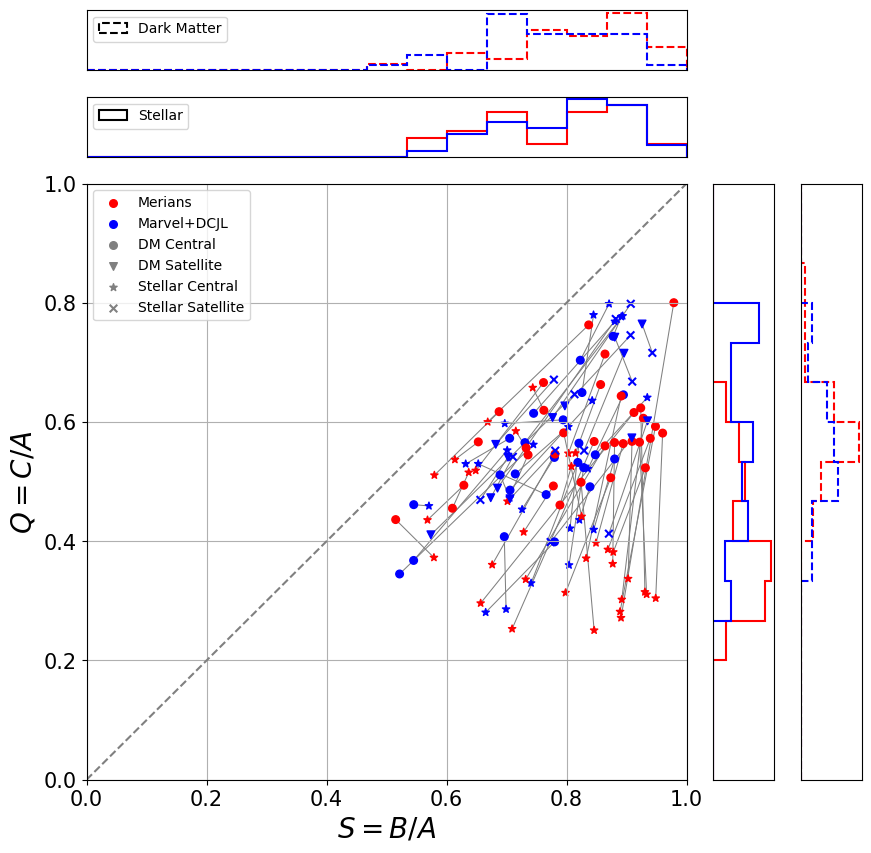

In [64]:
import importlib
importlib.reload(sdt)


sdt.plot_data(B_s, C_s, T_s, B_d, C_d, T_d, masses, mb, htype, reff, mvir, feedback_type,condition=None)


In [81]:


print((mask))

# B_s,C_s,T_s,B_d,C_d,T_d,masses,mb,htype,reff,mvir,feedback_type,sims,hids,mergers = B_s[~mask],C_s[~mask],T_s[~mask],B_d[~mask],C_d[~mask],T_d[~mask],masses[~mask],mb[~mask],htype[~mask],reff[~mask],mvir[~mask],feedback_type[~mask],sims[~mask],hids[~mask],mergers[~mask]



[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0. nan nan  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.]


In [9]:
print(mergers.shape)
#print non [[nan, nan ]] mergers
# but do print [[nan, float]] mergers
print(mergers[~np.isnan(mergers).all(axis=2)])


(76, 1, 2)
[[0.17810017 0.10237943]
 [0.22633742 0.14154529]
 [       nan 0.01973334]
 [0.05835533 0.07839803]]


In [76]:
import importlib
importlib.reload(sdt)
from StellarDMTracing import colors

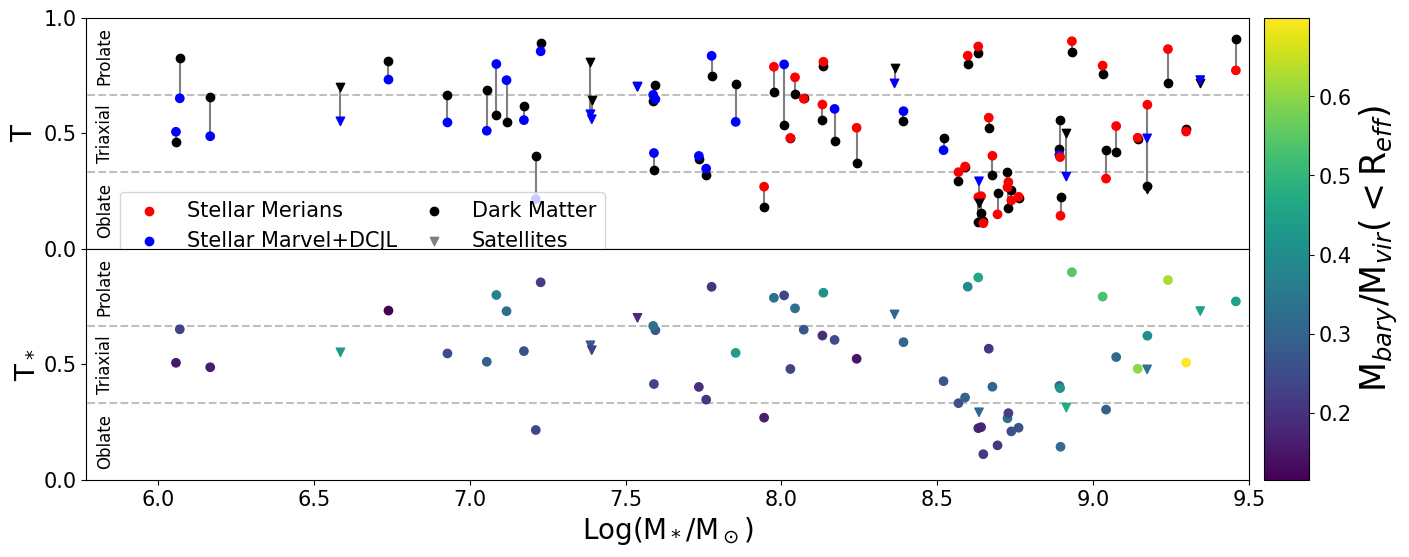

In [77]:
plt.style.use('default')
sdt.T_vs_Mstar(T_d,T_s,masses,mb,htype,feedback_type)


True, True 
 False, False
Merger ratios: 0.18, 0.10
Major: False, Minor: True
True, True 
 False, False
Merger ratios: 0.23, 0.14
Major: False, Minor: True
False, True 
 False, False
Merger ratios: nan, 0.02
Major: False, Minor: True


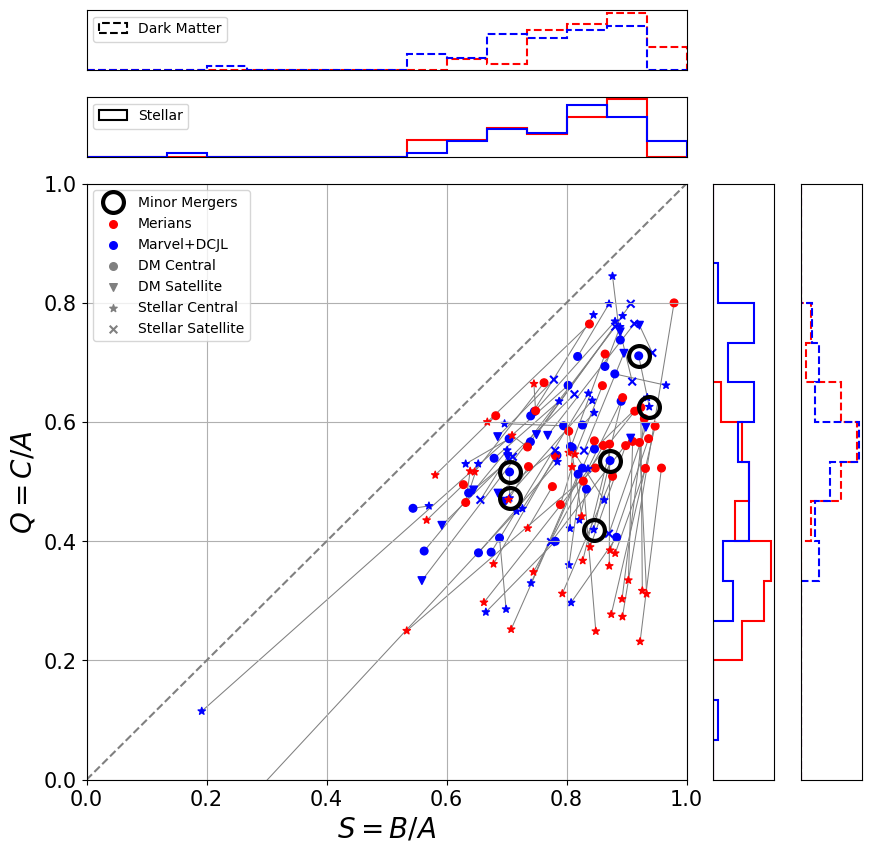

In [38]:
sdt.plot_data(B_s, C_s, T_s, B_d, C_d, T_d, masses, mb, htype, reff, mvir, feedback_type,mergers,show_lines=True) 


In [67]:
import matplotlib.pyplot as plt

from matplotlib.lines import Line2D
from matplotlib.markers import MarkerStyle
from matplotlib.transforms import Affine2D

text_style = dict(horizontalalignment='right', verticalalignment='center',
                  fontsize=12, fontfamily='monospace')
marker_style = dict(linestyle=':', color='0.8', markersize=10,
                    markerfacecolor="tab:blue", markeredgecolor="tab:blue")


def format_axes(ax):
    ax.margins(0.2)
    ax.set_axis_off()
    ax.invert_yaxis()


def split_list(a_list):
    i_half = len(a_list) // 2
    return a_list[:i_half], a_list[i_half:]



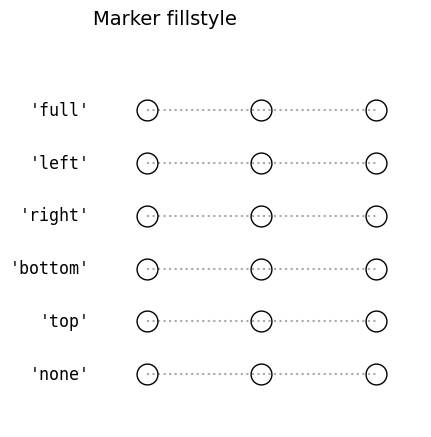

In [52]:
fig, ax = plt.subplots()
fig.suptitle('Marker fillstyle', fontsize=14)
fig.subplots_adjust(left=0.4)

filled_marker_style = dict(marker='o', linestyle=':', markersize=15,
                           color='darkgrey',
                           markerfacecolor='none',
                           markeredgecolor='k')

for y, fill_style in enumerate(Line2D.fillStyles):
    ax.text(-0.5, y, repr(fill_style), **text_style)
    ax.plot([y] * 3, fillstyle=fill_style, **filled_marker_style)
format_axes(ax)


In [ ]:
sdt.T_vs_Tdm(T_d, T_s,masses,htype,feedback_type,legend = ['Marvel+DCJL','Merians'],label = 'CDM')

slope: 0.2895907018269138, intercept: -1.056149290262844, r: 0.5428823610565602, pval: 1.201903872276549e-06, stderr: 0.05432563644187754, intercept_stderr: 0.4367768214565557
slope: 0.0828895655794807, intercept: 0.35415613845887883, r: 0.5587665904383409, pval: 4.981801980495137e-07, stderr: 0.014919000040494198, intercept_stderr: 0.1199484045432027


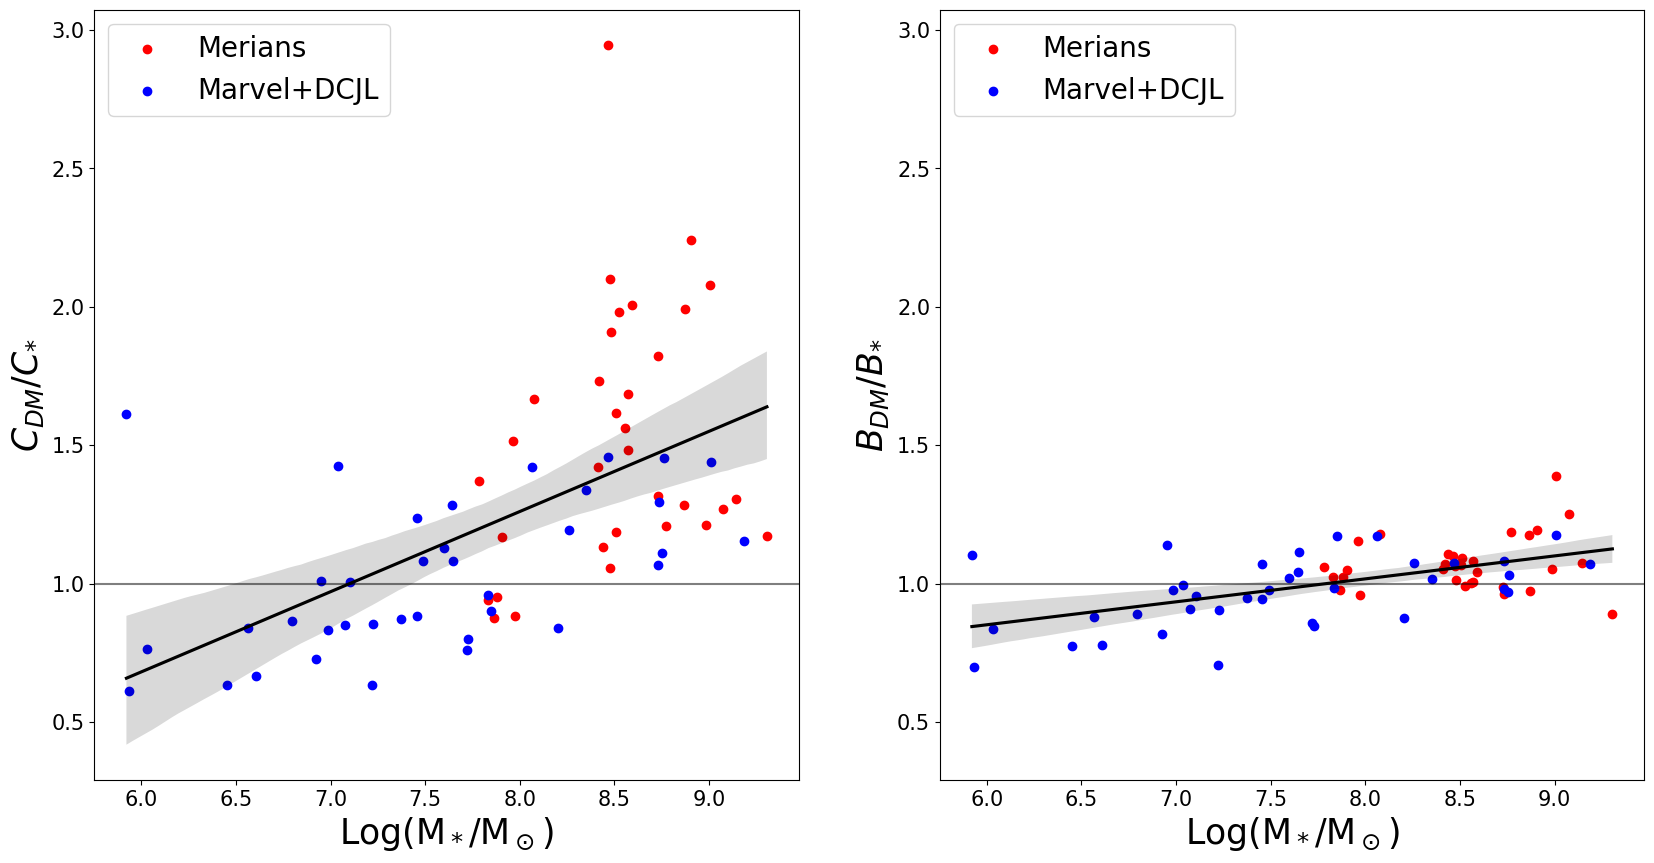

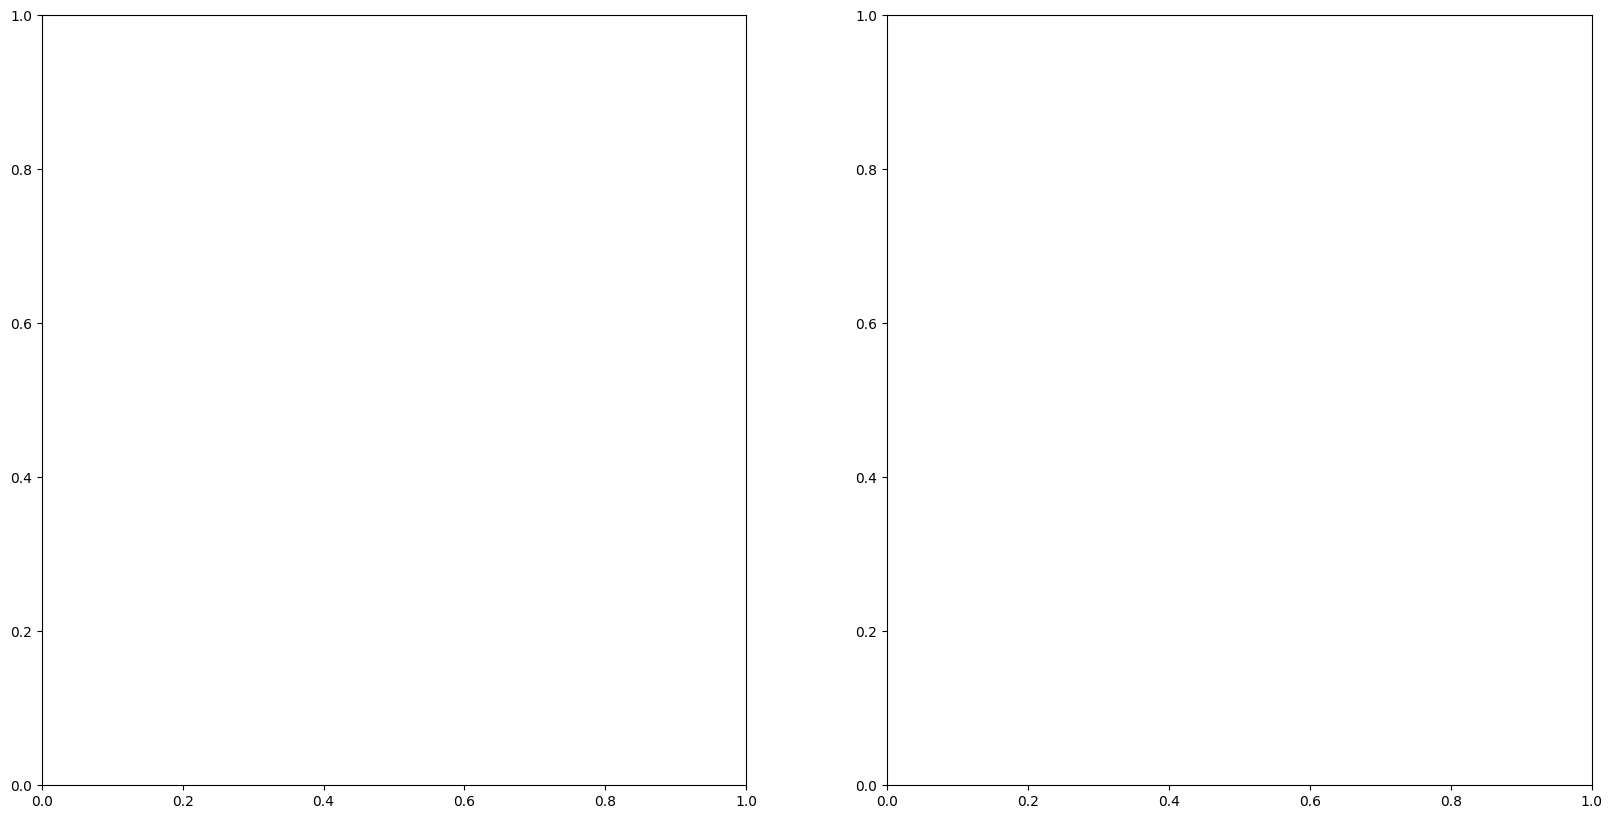

In [13]:
plt.style.use('default')

def axis_difference(d,s):
    #absolote difference
    #return d-s
    #relative difference
    avg = np.average([d, s], axis=0)
    #return (d-s)/avg
    #ratio
    return d/s

fig,axes = plt.subplots(1,2,figsize=(20,10))
ax = axes[0]
#ax.set_ylim([.4,2.4])

c_ratio = axis_difference(C_d,C_s)
# now plotting ratio of C_d/C_s
ylabel = r'$C_{DM}/C_{*}$'
#ylabel = r'$\Delta C = \frac{C_{DM} - C_{*}}{\bar{C}}$'
sdt.plot_DM_S_axes_diffs(ax,c_ratio,masses,feedback_type,ylabel)

axes[1].sharey(axes[0])

ax=axes[1]
b_ratio = axis_difference(B_d,B_s)
ylabel = r'$B_{DM}/B_{*}$'
#ylabel = r'$\Delta B = \frac{B_{DM} - B_{*}}{\bar{B}}$'
sdt.plot_DM_S_axes_diffs(ax,b_ratio,masses,feedback_type,ylabel)


def plot_DM_S_axes_diffs(ax,c_diff,masses,feedback_type,ylabel):

    ax.scatter(masses[feedback_type == 'MerianCDM'], c_diff[feedback_type == 'MerianCDM'], label='Merians',
               c=colors['MerianCDM'])
    ax.scatter(masses[feedback_type == 'BWMDC'], c_diff[feedback_type == 'BWMDC'], label='Marvel+DCJL',
               c=colors['BWMDC'])
    # plot y = 0 line
    ax.axhline(1, c='k', linestyle='-', alpha=.5)
    ax.set_xlabel(r'Log(M$_*$/M$_\odot$)', fontsize=25)
    ax.set_ylabel(ylabel, fontsize=25)
    ax.legend(loc='upper left', prop={'size': 20})
    # linear fit and show error on plot
    # increase tick size and font
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=15)

    # sns.regplot(x=masses[feedback_type=='MerianCDM'],y=c_diff[feedback_type=='MerianCDM'],ax=ax,scatter=False)
    # sns.regplot(x=masses[feedback_type=='BWMDC'],y=c_diff[feedback_type=='BWMDC'],ax=ax,scatter=False)
    sns.regplot(x=masses, y=c_diff, ax=ax, scatter=False, color='k', label='Linear Fit')
    # get linear fit parameters using scipy.stats.linregress
    from scipy.stats import linregress
    LinregressResult = linregress(masses, c_diff)
    slope = LinregressResult.slope
    intercept = LinregressResult.intercept
    rv = LinregressResult.rvalue
    pval = LinregressResult.pvalue
    stderr = LinregressResult.stderr
    intercept_stderr = LinregressResult.intercept_stderr
    print(
        f'slope: {slope}, intercept: {intercept}, r: {rv}, pval: {pval}, stderr: {stderr}, intercept_stderr: {intercept_stderr}')

    # plot linear fit
    x = np.linspace(6, 9.5, 100)
    y = slope * x + intercept
    # ax.plot(x,y,c='k',linestyle='--',label='Linear Fit')
    # add confidence interval from both slope error and intercept error


#ax.text(6.5,.2,r'$\Delta C = {slope:.2f}M_* + {intercept:.2f}$',fontsize=15)
fig.savefig(f'../../Figures/3DShapes/MvC_diff.png',bbox_inches='tight',pad_inches=.1,dpi = 300)

#create a similar plot but instead of mass use m_b/m_vir within Reff as x axis
#also try plotting disky vs nondisky for colors instead of feedback type
#change labels to Q and S instead of B and C






     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.8/378.8 kB 7.2 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 549.7 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 1.2 MB/s eta 0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 80.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.0/115.0 kB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.7/255.7 kB 101.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.3/247.3 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.8/350.8 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [282]:
mask = abs(T_d - T_s) < .05
#print(sum(mask))

#print(T_d[mask],T_s[mask],T_d[mask]-T_s[mask])

#look for repeated values in T_d and T_s
for i in range(len(T_d)):
    for j in range(i+1,len(T_d)):
        if T_d[i] == T_d[j] or T_s[i] == T_s[j]:
            print(i,j)
            print(T_d[i],T_s[i],T_d[j],T_s[j])




In [226]:
SimFilePath = ['../PickleFiles/SimulationInfo.MerianCDM.pickle','../PickleFiles/SimulationInfo.MerianSIDM.pickle']
MassPath = ['../../Data/BasicData/MerianCDM.Masses.pickle','../../Data/BasicData/MerianSIDM.Masses.pickle']
HaloTypePath = ['../../Data/BasicData/HaloTypes.MerianCDM.txt','../../Data/BasicData/HaloTypes.MerianSIDM.txt']
feedback = ['MerianCDM','MerianSIDM']
B_s,C_s,T_s,B_d,C_d,T_d,masses,mb,htype,reff,mvir,feedback_type,sims = sdt.LoadSimData(SimFilePath,MassPath,HaloTypePath,feedback,return_sims=True)

#main(B_s,C_s,T_s,B_d,C_d,T_d,masses,mb,htype,reff,mvir,feedback_type,r[i])

TypeError: LoadSimData() got multiple values for argument 'return_sims'

r488 r488
r492 r492
r618 r618
r544 r544
r523 r523
r468 r468
r634 r634
r597 r597
Triaxality
Length of idx_CDM: 1
Contents of idx_CDM: [13]


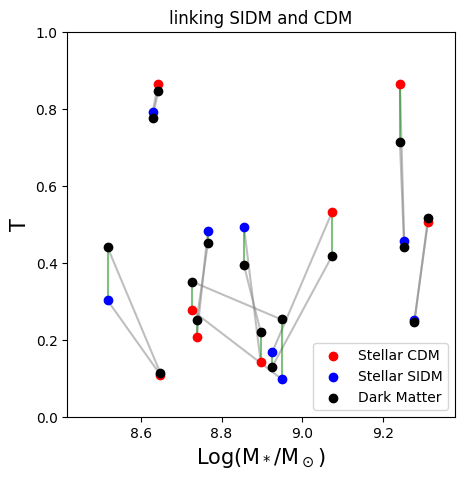

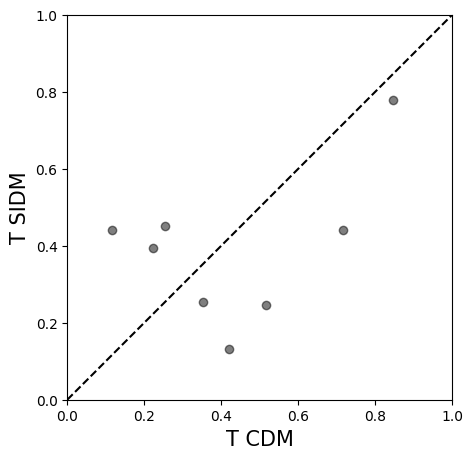

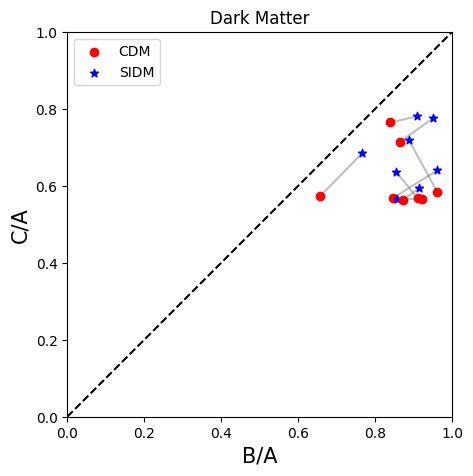

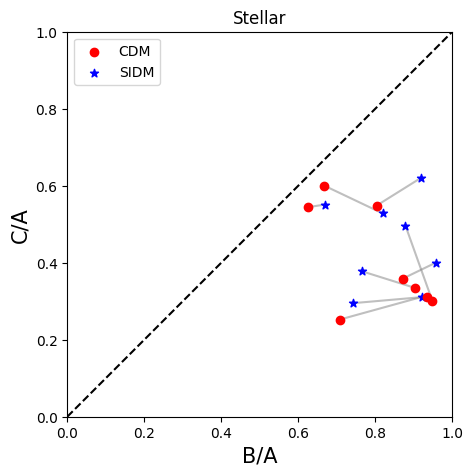

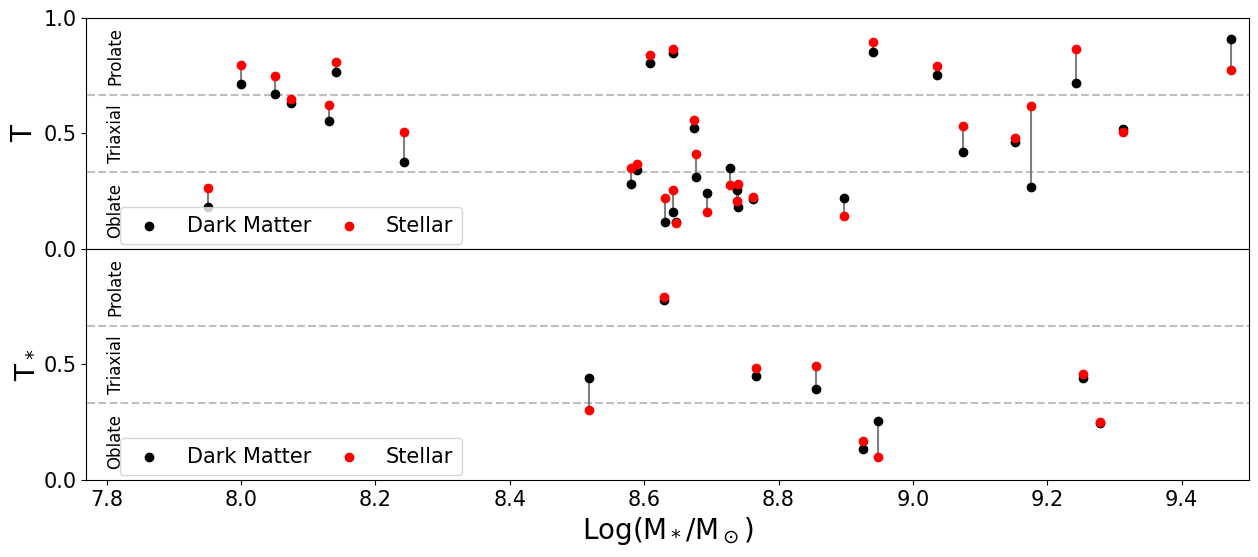

In [192]:
sdt.plot_SIDM_CDM(B_s,C_s,T_s,B_d,C_d,T_d,masses,mb,htype,reff,mvir,feedback_type,sims)

In [ ]:
plt.rcParams['font.family'] = 'DejaVu Sans'

dpi = 300


#Convert lists to arrays for htype indexing
T_d,T_s,masses,mb,htype = np.array(T_d),np.array(T_s),np.array(masses),np.array(mb),np.array(htype)
B_s,C_s,B_d,C_d = np.array(B_s),np.array(C_s),np.array(B_d),np.array(C_d)

#T* vs Tdm
f,ax = plt.subplots(1,1,figsize=(5,5))
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.fill_between([0,1],[-1/3,2/3],[1/3,4/3],color='0.75',alpha=.3)
ax.plot([0,1],[0,1],c='0.5',linestyle='--')
ax.set_ylabel(r'T$_*$',fontsize=15)
ax.set_xlabel(r'T$_{DM}$',fontsize=15)

norm = plt.Normalize(int(min(masses)),int(max(masses))+.1)
p = ax.scatter(T_d[htype=='o'],T_s[htype=='o'],marker='o',c=masses[htype=='o'],cmap='viridis',norm=norm)
ax.scatter(T_d[htype=='v'],T_s[htype=='v'],marker='v',c=masses[htype=='v'],cmap='viridis',norm=norm,label='Satellites')
cbar = f.colorbar(p,cax=f.add_axes([.91,.11,.03,.77]))
cbar.set_label(r'Log(M$_*$/M$_\odot$)',fontsize=15)

ax.legend(loc='lower left',prop={'size':12})
f.savefig(f'../../Figures/3DShapes/T_Comparison.png',bbox_inches='tight',pad_inches=.1,dpi = dpi)

In [ ]:
#B/A vs C/A links
f,ax = plt.subplots(1,1,figsize=(5,5))
ax.set_xlim([0,1])
ax.set_ylim([0,1])
#ax.fill_between([0,1],[-.1,.9],[.1,1.1],color='0.75',alpha=.3)
ax.plot([0,1],[0,1],c='0.5',linestyle='--')
ax.set_xlabel(r'$S$',fontsize=20)
ax.set_ylabel(r'$Q$',fontsize=20)
ax.tick_params(which='both',labelsize=15)
ax.scatter(-1,-1)

for i in np.arange(len(B_s)):
    ax.plot([B_s[i],B_d[i]],[C_s[i],C_d[i]],c='.5',zorder=0)

f.savefig(f'../../Figures/3DShapes/CvB.LinksOnly.png',bbox_inches='tight',pad_inches=.1)

ax.scatter(B_d[htype=='o'],C_d[htype=='o'],c='k',label='Dark Matter')
ax.scatter(B_d[htype=='v'],C_d[htype=='v'],c='k',marker='v')
ax.scatter(B_s[htype=='o'],C_s[htype=='o'],c='r',label='Stellar')
ax.scatter(B_s[htype=='v'],C_s[htype=='v'],c='r',marker='v')
ax.scatter(-1,-1,c='.5',marker='v',label='Satellites')

ax.legend(loc='upper left',prop={'size':15})
f.savefig(f'../../Figures/3DShapes/CvB.Links.png',bbox_inches='tight',pad_inches=.1,dpi = dpi)

In [ ]:
import matplotlib.font_manager
fonts = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
print([matplotlib.font_manager.FontProperties(fname=f).get_name() for f in fonts])


In [ ]:
import matplotlib.font_manager
matplotlib.font_manager._load_fontmanager(try_read_cache=False)